In [28]:
import pandas as pd
df = pd.read_csv("Food_Time new.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          9995 non-null   object 
 4   Type_of_order                10000 non-null  object 
 5   Type_of_vehicle              10000 non-null  object 
 6   Delivery_person_Age          10000 non-null  int64  
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  object 
 9   Restaurant_longitude         10000 non-null  object 
 10  Delivery_location_latitude   10000 non-null  object 
 11  Delivery_location_longitude  10000 non-null  object 
 12  temperature                  9995 non-null   float64
 13  humidity         

In [29]:
df.describe()

Delivery_person_Age  Delivery_person_Ratings  temperature     humidity  \
count         10000.000000             10000.000000  9995.000000  9995.000000   
mean             29.522000                 4.629370    22.936907    66.164882   
std               5.700348                 0.322941     3.379448    15.602939   
min              15.000000                 1.000000     6.770000    27.000000   
25%              25.000000                 4.500000    20.140000    54.000000   
50%              29.000000                 4.700000    23.000000    67.000000   
75%              34.000000                 4.800000    25.980000    81.000000   
max              50.000000                 6.000000    29.050000    94.000000   

       precipitation  Distance (km)  
count    9995.000000    9080.000000  
mean        0.016233      14.292747  
std         0.074911       8.376254  
min         0.000000       1.550000  
25%         0.000000       7.620000  
50%         0.000000      13.400000  
75%         0.000000      19.610000  
max         1.460000      59.840000

In [30]:
df.nunique()

Traffic_Level                     5
ID                             9995
Delivery_person_ID             1285
weather_description              11
Type_of_order                     4
Type_of_vehicle                   4
Delivery_person_Age              22
Delivery_person_Ratings          28
Restaurant_latitude             485
Restaurant_longitude            427
Delivery_location_latitude     3445
Delivery_location_longitude    3445
temperature                    1069
humidity                         64
precipitation                    35
Distance (km)                  2343
TARGET                         3370
dtype: int64

In [31]:
df.isnull().sum()

Traffic_Level                  915
ID                               0
Delivery_person_ID               0
weather_description              5
Type_of_order                    0
Type_of_vehicle                  0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
temperature                      5
humidity                         5
precipitation                    5
Distance (km)                  920
TARGET                         541
dtype: int64

In [32]:
df = df.dropna(subset=["weather_description"])

In [33]:
df.isnull().sum()

Traffic_Level                  915
ID                               0
Delivery_person_ID               0
weather_description              0
Type_of_order                    0
Type_of_vehicle                  0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
temperature                      0
humidity                         0
precipitation                    0
Distance (km)                  920
TARGET                         536
dtype: int64

In [34]:
df_median = df["Distance (km)"].median()

In [35]:
df["Distance (km)"] = df["Distance (km)"].fillna(df_median)

In [36]:
import numpy as np
df.loc[df["TARGET"].str.contains("#", na=False), "TARGET"] = np.nan
df["TARGET"] = df["TARGET"].str.replace(".", "", regex=False)
df = df.dropna(subset=["TARGET"])
df["TARGET"] = df["TARGET"].astype(int)
def fix_target(value):
    value = float(value)
    if value < 100000:
        result = value / 100
    else:
        result = value / 100000000
    return int(round(result))  # arrotonda al minuto più vicino
df["TARGET"] = df["TARGET"].apply(fix_target)

In [37]:
def fix_coord(col):
    return (
        df[col]
        .astype(str)
        .str.replace(".", "", regex=False)
        .astype(int)
        / 1_000_000
    )

coord_cols = [
    "Restaurant_latitude", "Restaurant_longitude",
    "Delivery_location_latitude", "Delivery_location_longitude"
]

for col in coord_cols:
    df[col] = fix_coord(col)

if "ID" in df.columns:
    df = df.drop(columns=["ID"])


In [38]:
df.info()
df["TARGET"].head(30)


<class 'pandas.core.frame.DataFrame'>
Index: 9040 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9040 non-null   object 
 1   Delivery_person_ID           9040 non-null   object 
 2   weather_description          9040 non-null   object 
 3   Type_of_order                9040 non-null   object 
 4   Type_of_vehicle              9040 non-null   object 
 5   Delivery_person_Age          9040 non-null   int64  
 6   Delivery_person_Ratings      9040 non-null   float64
 7   Restaurant_latitude          9040 non-null   float64
 8   Restaurant_longitude         9040 non-null   float64
 9   Delivery_location_latitude   9040 non-null   float64
 10  Delivery_location_longitude  9040 non-null   float64
 11  temperature                  9040 non-null   float64
 12  humidity                     9040 non-null   float64
 13  precipitation          

0     43
1     38
2     36
3     49
4     52
5     35
6     44
7     54
8     47
9     47
10    46
11    41
12    44
13    46
14    50
15    50
16     4
17    45
18    46
19    36
20    40
21    48
22     5
23    47
24    53
25    52
26     3
27     4
28    46
29    41
Name: TARGET, dtype: int64

In [39]:
df["Delivery_location_latitude"].info()
df["Delivery_location_longitude"].info()

<class 'pandas.core.series.Series'>
Index: 9040 entries, 0 to 9999
Series name: Delivery_location_latitude
Non-Null Count  Dtype  
--------------  -----  
9040 non-null   float64
dtypes: float64(1)
memory usage: 141.2 KB
<class 'pandas.core.series.Series'>
Index: 9040 entries, 0 to 9999
Series name: Delivery_location_longitude
Non-Null Count  Dtype  
--------------  -----  
9040 non-null   float64
dtypes: float64(1)
memory usage: 141.2 KB


Traffic_Level                     5
ID                             9995
Delivery_person_ID             1285
weather_description              11
Type_of_order                     4
Type_of_vehicle                   4
Delivery_person_Age              22
Delivery_person_Ratings          28
Restaurant_latitude             485
Restaurant_longitude            427
Delivery_location_latitude     3445
Delivery_location_longitude    3445
temperature                    1069
humidity                         64
precipitation                    35
Distance (km)                  2343
TARGET                         3370

In [40]:
import pandas as pd
df = pd.read_csv("Food_Time new.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          9995 non-null   object 
 4   Type_of_order                10000 non-null  object 
 5   Type_of_vehicle              10000 non-null  object 
 6   Delivery_person_Age          10000 non-null  int64  
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  object 
 9   Restaurant_longitude         10000 non-null  object 
 10  Delivery_location_latitude   10000 non-null  object 
 11  Delivery_location_longitude  10000 non-null  object 
 12  temperature                  9995 non-null   float64
 13  humidity         

In [41]:
df.describe()

Delivery_person_Age  Delivery_person_Ratings  temperature     humidity  \
count         10000.000000             10000.000000  9995.000000  9995.000000   
mean             29.522000                 4.629370    22.936907    66.164882   
std               5.700348                 0.322941     3.379448    15.602939   
min              15.000000                 1.000000     6.770000    27.000000   
25%              25.000000                 4.500000    20.140000    54.000000   
50%              29.000000                 4.700000    23.000000    67.000000   
75%              34.000000                 4.800000    25.980000    81.000000   
max              50.000000                 6.000000    29.050000    94.000000   

       precipitation  Distance (km)  
count    9995.000000    9080.000000  
mean        0.016233      14.292747  
std         0.074911       8.376254  
min         0.000000       1.550000  
25%         0.000000       7.620000  
50%         0.000000      13.400000  
75%         0.000000      19.610000  
max         1.460000      59.840000

In [42]:
df.nunique()

Traffic_Level                     5
ID                             9995
Delivery_person_ID             1285
weather_description              11
Type_of_order                     4
Type_of_vehicle                   4
Delivery_person_Age              22
Delivery_person_Ratings          28
Restaurant_latitude             485
Restaurant_longitude            427
Delivery_location_latitude     3445
Delivery_location_longitude    3445
temperature                    1069
humidity                         64
precipitation                    35
Distance (km)                  2343
TARGET                         3370
dtype: int64

In [43]:
df.isnull().sum()

Traffic_Level                  915
ID                               0
Delivery_person_ID               0
weather_description              5
Type_of_order                    0
Type_of_vehicle                  0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
temperature                      5
humidity                         5
precipitation                    5
Distance (km)                  920
TARGET                         541
dtype: int64

In [44]:
df = df.dropna(subset=["weather_description"])

In [45]:
df.isnull().sum()

Traffic_Level                  915
ID                               0
Delivery_person_ID               0
weather_description              0
Type_of_order                    0
Type_of_vehicle                  0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
temperature                      0
humidity                         0
precipitation                    0
Distance (km)                  920
TARGET                         536
dtype: int64

In [46]:
df = df.dropna(subset=["weather_description"])

In [47]:
df["Distance (km)"] = df["Distance (km)"].fillna(df["Distance (km)"].median())


In [48]:
df.isnull().sum()

Traffic_Level                  915
ID                               0
Delivery_person_ID               0
weather_description              0
Type_of_order                    0
Type_of_vehicle                  0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
temperature                      0
humidity                         0
precipitation                    0
Distance (km)                    0
TARGET                         536
dtype: int64

In [49]:
def fix_coord(col):
    return (
        df[col]
        .astype(str)
        .str.replace(".", "", regex=False)
        .astype(int)
        / 1_000_000
    )

coord_cols = [
    "Restaurant_latitude", "Restaurant_longitude",
    "Delivery_location_latitude", "Delivery_location_longitude"
]

In [50]:
for col in coord_cols:
    df[col] = fix_coord(col)

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

In [51]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9995 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9080 non-null   object 
 1   Delivery_person_ID           9995 non-null   object 
 2   weather_description          9995 non-null   object 
 3   Type_of_order                9995 non-null   object 
 4   Type_of_vehicle              9995 non-null   object 
 5   Delivery_person_Age          9995 non-null   int64  
 6   Delivery_person_Ratings      9995 non-null   float64
 7   Restaurant_latitude          9995 non-null   float64
 8   Restaurant_longitude         9995 non-null   float64
 9   Delivery_location_latitude   9995 non-null   float64
 10  Delivery_location_longitude  9995 non-null   float64
 11  temperature                  9995 non-null   float64
 12  humidity                     9995 non-null   float64
 13  precipitation          

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Age_norm", "Rating_norm"]] = scaler.fit_transform(df[["Delivery_person_Age", "Delivery_person_Ratings"]])
df["Age_Rating_score"] = (df["Age_norm"] + df["Rating_norm"]) / 2
df["Rider_Experience"] = df["Delivery_person_Age"] * df["Delivery_person_Ratings"]

In [53]:
from haversine import haversine

df["distance_real_km"] = df.apply(lambda row: haversine(
    (row["Restaurant_latitude"], row["Restaurant_longitude"]),
    (row["Delivery_location_latitude"], row["Delivery_location_longitude"])
), axis=1)


In [ ]:
traffic_mapping = {"Low": 1, "Very low": 2, "Moderate": 3, "High": 4, "Very high":4}
df["Traffic_Level_num"] = df["Traffic_Level"].map(traffic_mapping)
df["Distance_Traffic"] = df["Distance (km)"] * df["Traffic_Level_num"]
df["Traffic_Weather_Risk"] = df["Traffic_Level_num"] * df["precipitation"]

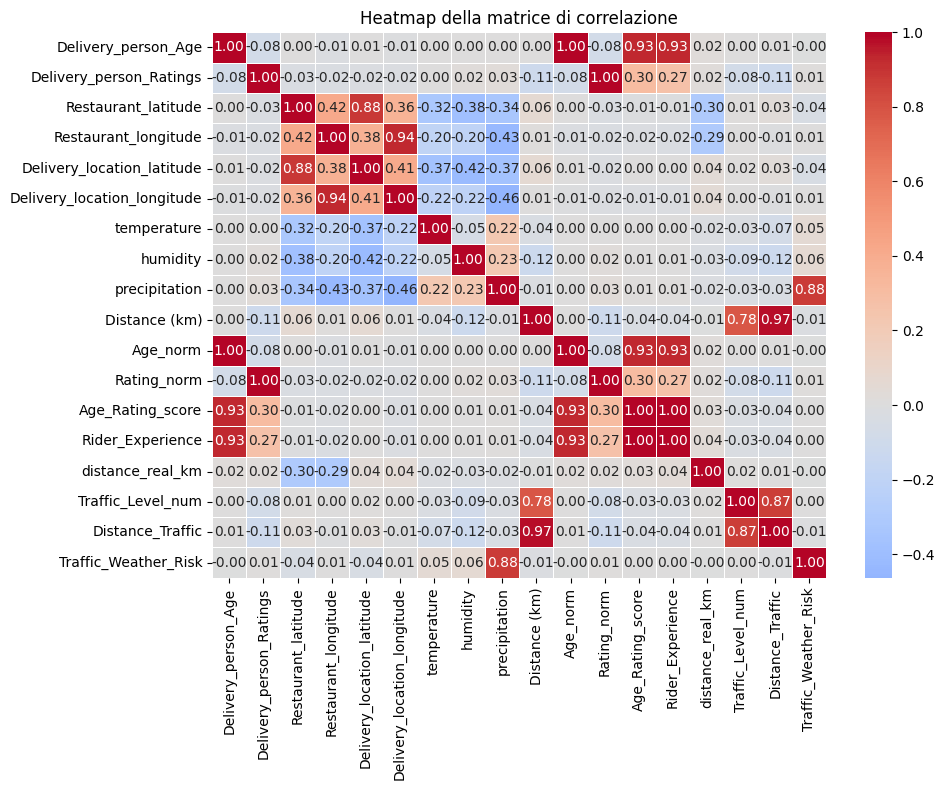

<Figure size 1500x1300 with 0 Axes>

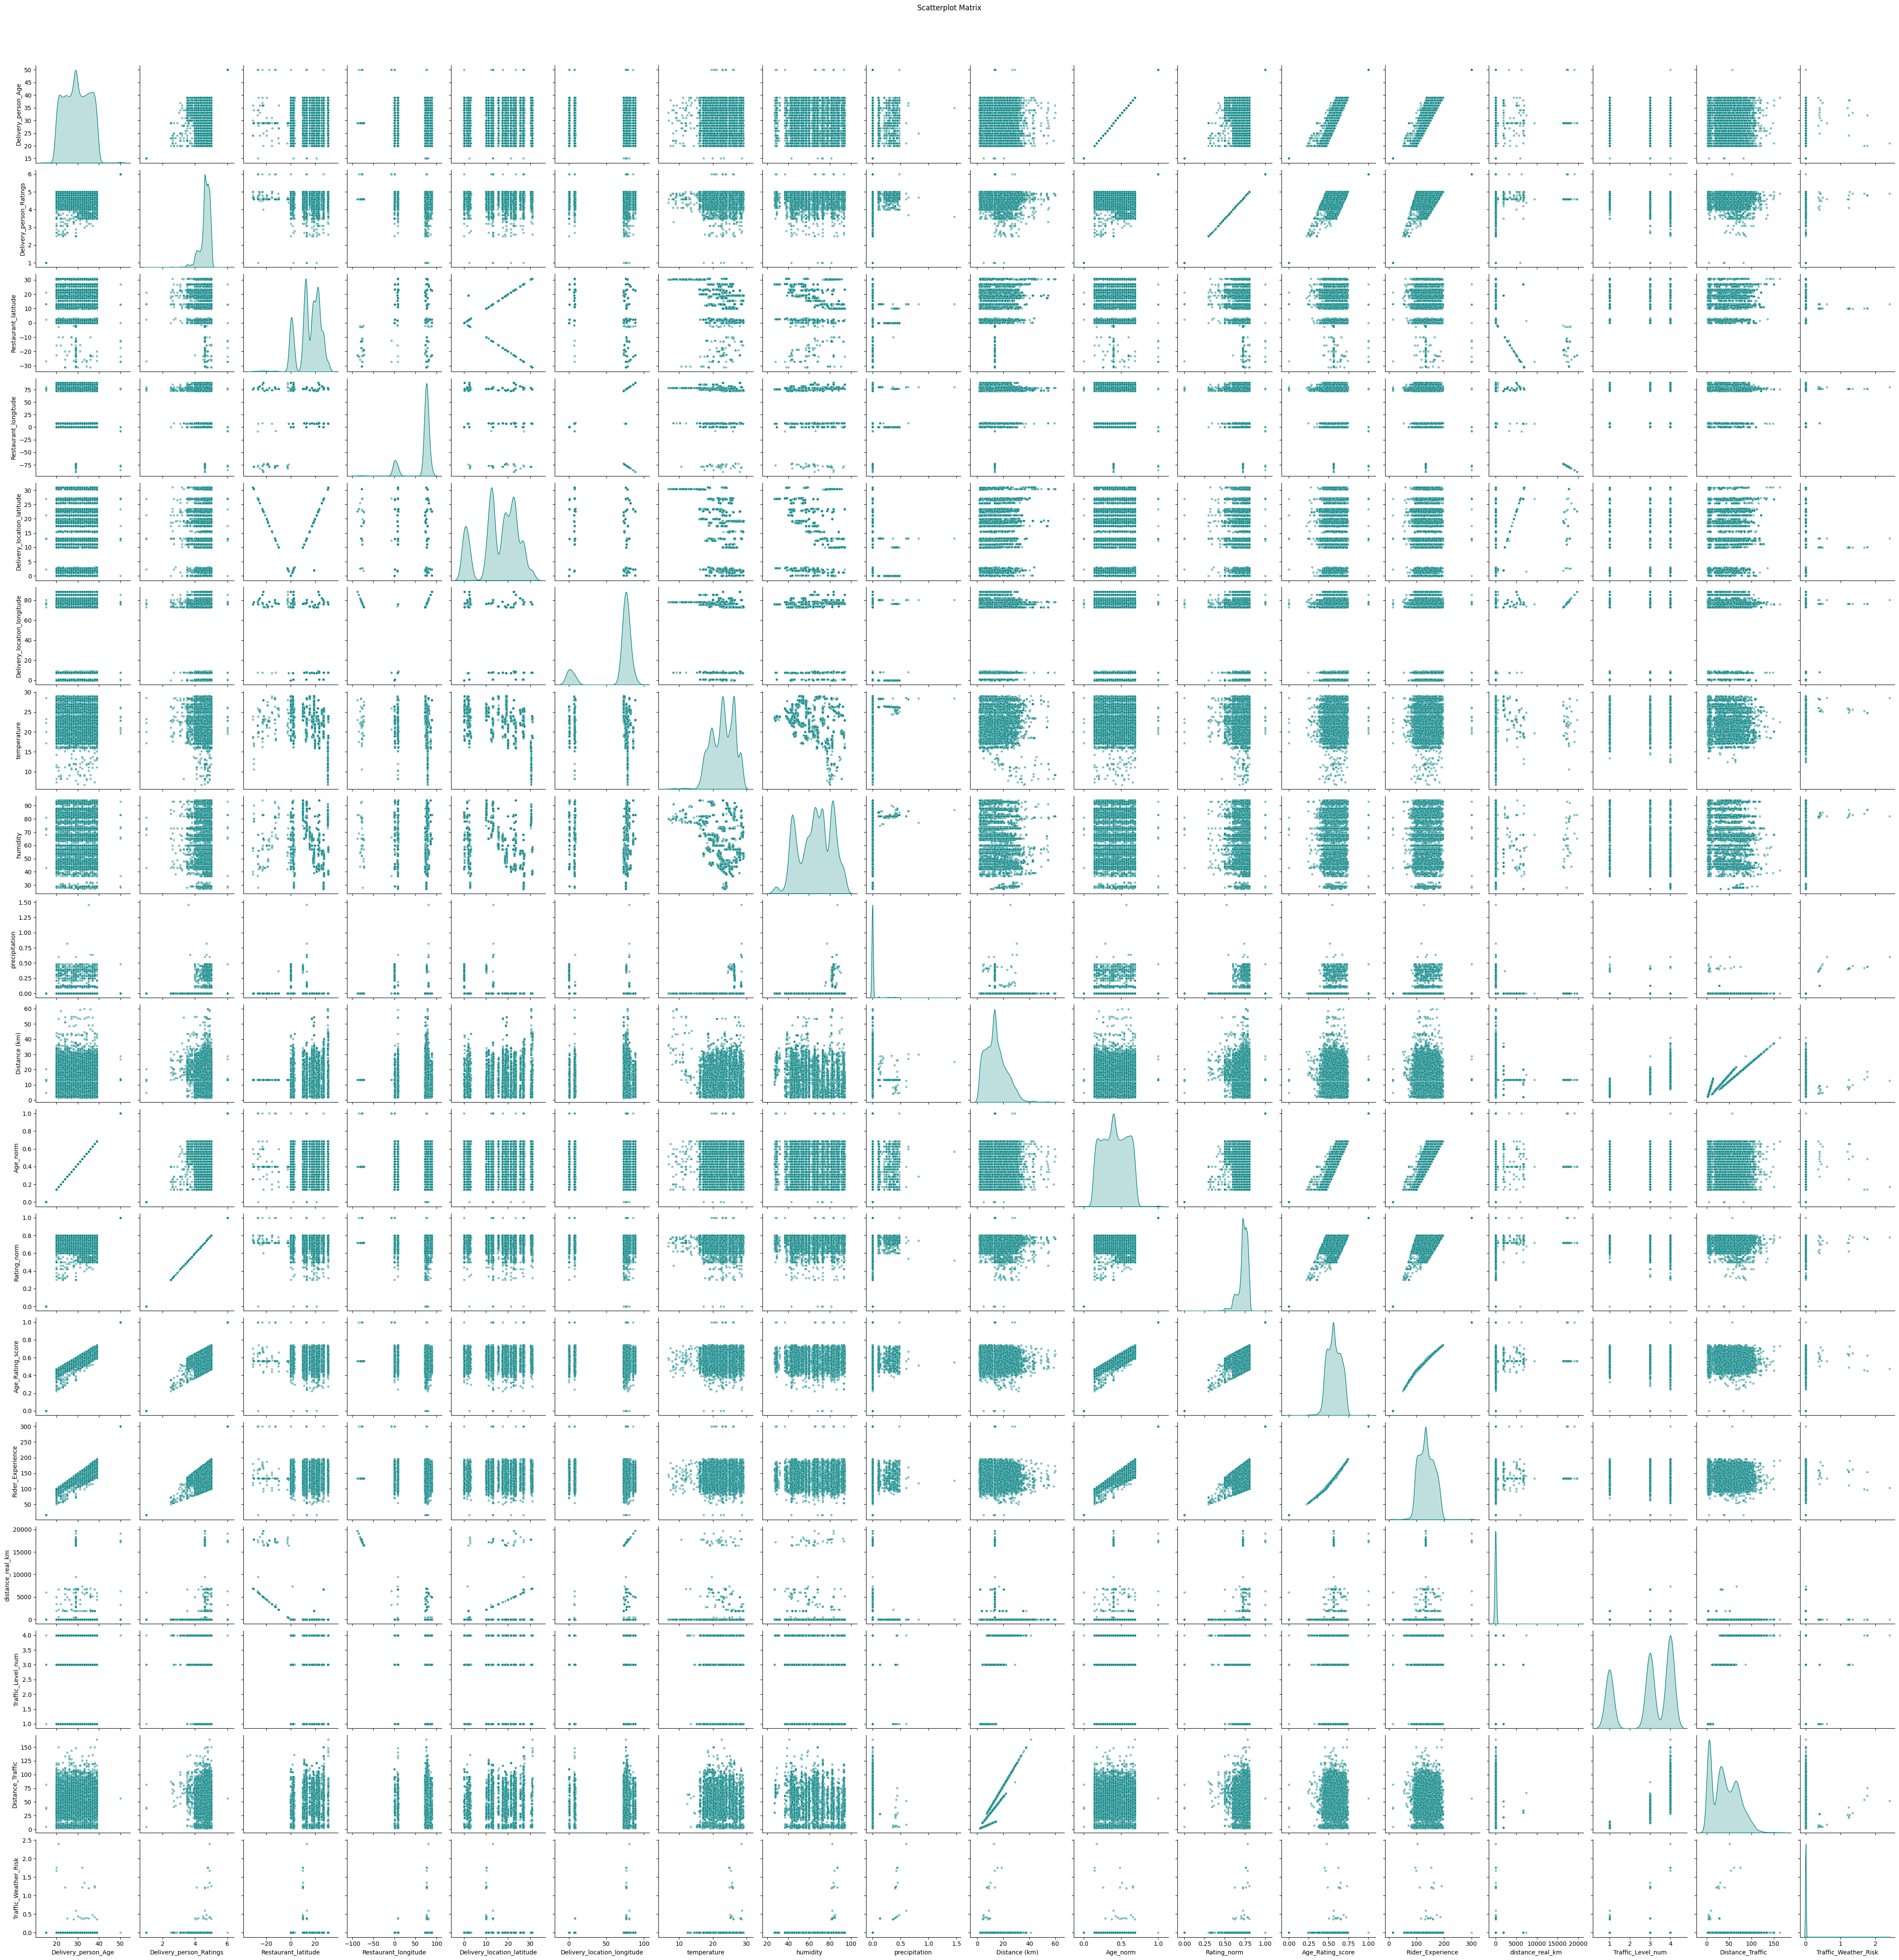

In [58]:

import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")
plt.title("Heatmap della matrice di correlazione")
plt.tight_layout()
plt.show()



plt.figure(figsize=(15, 13))
g = sns.pairplot(num_df, 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15, 'color': 'teal'},
                 diag_kws={'color': 'teal', 'fill': True},
                 height=2.5)

g.figure.suptitle('Scatterplot Matrix', y=1.02)
plt.show()